# SIR with treatment

Take the simple SIR model, but now assume that there is a treatment. This treatment reduces the time it takes to recover, but during treatment people are still infectious. 

The relations between the compartments are shown in this figure:
<img src="SIRT.png" alt="isolated" width="400"/>


The system of equations that describe the evolution of the populations is

\begin{align}
 \dot S &= -\lambda S \\
 \dot I &= \lambda \ S -h \ I -\gamma \ I \\
 \dot T &= h \ I - \gamma_T T \\
 \dot R &= \gamma \ I + \gamma_T \ T \;.
\end{align}

The new part to understand here is the change in the force of infection, $\lambda$. Since people in treatment can still infect people, the infection rate has to account for them. That is, the force of infection gets an extra term compared to the simple SIR model, i.e.

$$
\lambda = \dfrac{\beta \, I + \beta_T \, T}{N} \;,
$$

with $\beta_T$ the infection rate of people in treatment.

In [1]:
# LOAD THE PACKAGES:
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=5)
library(deSolve)

In [1]:
SIRT <- function(model, initial_values, time){    
    N=sum(initial_values)
    
    sys <- function(time,state,parameters) { 
                with(as.list(c(state,parameters)),{
                    lambda <- (beta*I + betaT*T)/N  
                    
                    dSdt <- -lambda*S 
                    dIdt <- lambda*S - (h+gamma)*I
                    dTdt <- h*I - gammaT*T
                    dRdt <- gamma*I + gammaT*T
                    return(list(c(dSdt,dIdt,dRdt,dTdt)))
                })
            }
    
    
    result <- as.data.frame(ode(
                y     = c(initial_values["S"],initial_values["I"],initial_values["R"],initial_values["T"]),  
                times = time,     
                func  = sys,
                parms = c(model["beta"],model["gamma"],model["betaT"],model["gammaT"],model["h"],model["N"])
             ))
    
    with(as.list(c(result,model)),{
        return(data.frame(time,S,I,R,T,beta,gamma,betaT,gammaT,h,N))
    })
}

In [2]:
disease <- SIRT(
                c(beta=0.6,gamma=1/5.,betaT=0.6,gammaT=1/1.25,h=1/4.),
                c(S=300000.-1,I=1,R=0,T=0),
                seq(0,80,by=1)
               )

ERROR: Error in ode(y = c(initial_values["S"], initial_values["I"], initial_values["R"], : could not find function "ode"


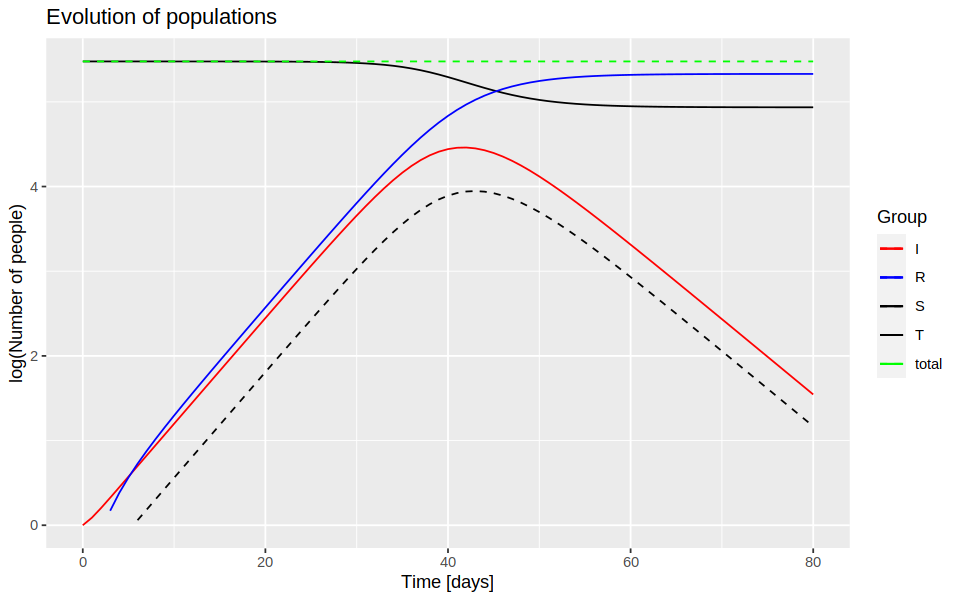

In [4]:
#Evolution of populations
colors <- c("S" = "black", "I" = "red", "R" = "blue", "T" = "black","total"="green")


ggplot( data = disease , aes(x=time)) + 
geom_line(aes(y = log10(S), color = "S")) +                 
geom_line(aes(y = log10(I), color = "I")) +                 
geom_line(aes(y = log10(R), color = "R")) +            
geom_line(aes(y = log10(T), color = "T"),linetype="dashed") +            
geom_line(aes(y = log10(S+I+R+T), color = "total"),linetype='dashed')   +  

xlim(0,max(disease$time))+
ylim(0,log10(disease$N[1]))+
labs(x = "Time [days]", y = "log(Number of people)", color = "Group", title = "Evolution of populations") +
scale_color_manual(values = colors)

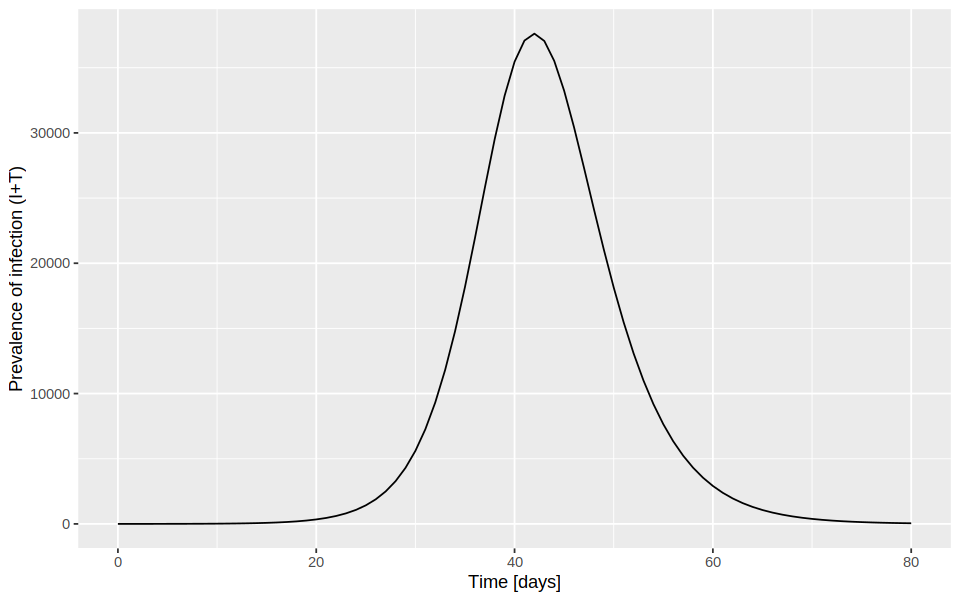

In [5]:
#Evolution of populations
ggplot(data = disease , aes(x=time))+ 
geom_line(aes(y=I+T))+
labs(x = "Time [days]", y = "Prevalence of infection (I+T)") 